In [14]:
import pandas as pd
import numpy as np

In [15]:
missing_value_format=["na","NA","n/a","n.a.","?","--"]
na=missing_value_format

data=[[1,'Hj',50,30,96,50],
     [2,"sp",45,78,np.nan,15],
     [3,"kk",np.nan,12,"--",78],
     [4,"ak",14,78,36,70],
     [5,"da",12,np.nan,10,"?"],
     [6,"bn",89,78,39,np.nan]]

df=pd.DataFrame(data,columns=["id","name","SPOS","DBMS","OOP","CNS"])

In [16]:
df

,id,name,SPOS,DBMS,OOP,CNS
0,1,Hj,50.0,30.0,96,50
1,2,sp,45.0,78.0,NaN,15
2,3,kk,NaN,12.0,--,78
3,4,ak,14.0,78.0,36,70
4,5,da,12.0,NaN,10,?
5,6,bn,89.0,78.0,39,NaN


In [17]:
df.replace(na,np.nan,inplace=True)

In [18]:
df

,id,name,SPOS,DBMS,OOP,CNS
0,1,Hj,50.0,30.0,96.0,50.0
1,2,sp,45.0,78.0,NaN,15.0
2,3,kk,NaN,12.0,NaN,78.0
3,4,ak,14.0,78.0,36.0,70.0
4,5,da,12.0,NaN,10.0,NaN
5,6,bn,89.0,78.0,39.0,NaN


In [19]:
df.dropna(axis=0)

,id,name,SPOS,DBMS,OOP,CNS
0,1,Hj,50.0,30.0,96.0,50.0
3,4,ak,14.0,78.0,36.0,70.0


In [20]:
df.dropna(axis=1)

,id,name
0,1,Hj
1,2,sp
2,3,kk
3,4,ak
4,5,da
5,6,bn


In [21]:
df

,id,name,SPOS,DBMS,OOP,CNS
0,1,Hj,50.0,30.0,96.0,50.0
1,2,sp,45.0,78.0,NaN,15.0
2,3,kk,NaN,12.0,NaN,78.0
3,4,ak,14.0,78.0,36.0,70.0
4,5,da,12.0,NaN,10.0,NaN
5,6,bn,89.0,78.0,39.0,NaN


In [22]:
df['SPOS'].fillna(method="pad",inplace=True)

In [23]:
df

,id,name,SPOS,DBMS,OOP,CNS
0,1,Hj,50.0,30.0,96.0,50.0
1,2,sp,45.0,78.0,NaN,15.0
2,3,kk,45.0,12.0,NaN,78.0
3,4,ak,14.0,78.0,36.0,70.0
4,5,da,12.0,NaN,10.0,NaN
5,6,bn,89.0,78.0,39.0,NaN


In [24]:
df['DBMS'].fillna(method='bfill',inplace=True)
df

,id,name,SPOS,DBMS,OOP,CNS
0,1,Hj,50.0,30.0,96.0,50.0
1,2,sp,45.0,78.0,NaN,15.0
2,3,kk,45.0,12.0,NaN,78.0
3,4,ak,14.0,78.0,36.0,70.0
4,5,da,12.0,78.0,10.0,NaN
5,6,bn,89.0,78.0,39.0,NaN


In [25]:
df['OOP'].fillna(0,inplace=True)

In [26]:
df

,id,name,SPOS,DBMS,OOP,CNS
0,1,Hj,50.0,30.0,96.0,50.0
1,2,sp,45.0,78.0,0.0,15.0
2,3,kk,45.0,12.0,0.0,78.0
3,4,ak,14.0,78.0,36.0,70.0
4,5,da,12.0,78.0,10.0,NaN
5,6,bn,89.0,78.0,39.0,NaN


In [27]:
df['CNS'].fillna(np.mean(df['CNS']),inplace=True)

In [28]:
df

,id,name,SPOS,DBMS,OOP,CNS
0,1,Hj,50.0,30.0,96.0,50.00
1,2,sp,45.0,78.0,0.0,15.00
2,3,kk,45.0,12.0,0.0,78.00
3,4,ak,14.0,78.0,36.0,70.00
4,5,da,12.0,78.0,10.0,53.25
5,6,bn,89.0,78.0,39.0,53.25


In [29]:
df.isna().values.any()

False

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='CNS'>

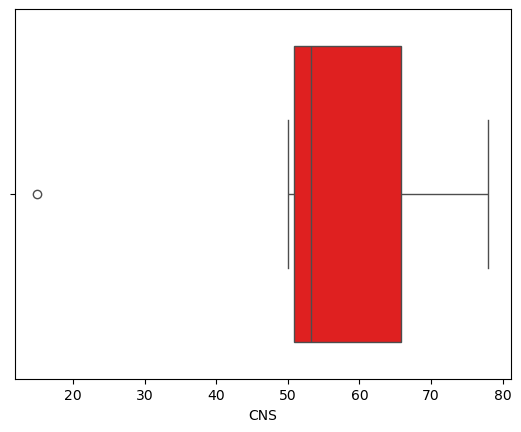

In [34]:
sns.boxplot(x="CNS",data=df,color="red")

<Axes: xlabel='OOP'>

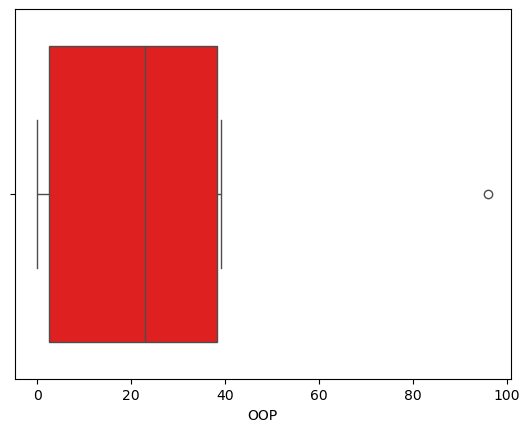

In [35]:
sns.boxplot(x="OOP",data=df,color="red")

In [40]:
def to_get_outliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    
    iqr=q3-q1
    lower_bound= q1-1.5*iqr
    upper_bound= q3+1.5*iqr
    outliers=data[(data<lower_bound)|(data>upper_bound)]
    return outliers
    

In [41]:
outliers=to_get_outliers(df["OOP"])
outliers

0    96.0
Name: OOP, dtype: float64

In [42]:
df=df[~df["OOP"].isin(outliers)]


<Axes: xlabel='OOP'>

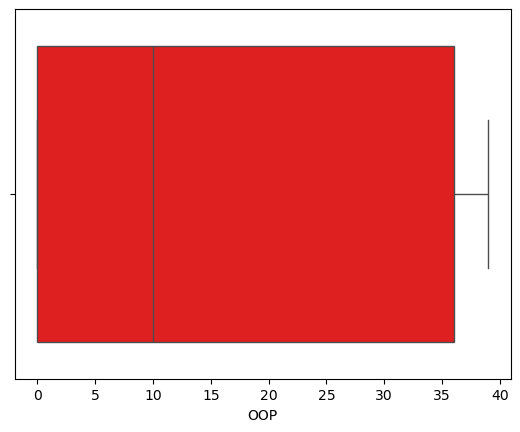

In [43]:
sns.boxplot(x="OOP",data=df,color="red")

In [44]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df[["OOP","SPOS","DBMS","CNS"]]=sc.fit_transform(df[["OOP","SPOS","DBMS","CNS"]])

C:\Users\Harshada\AppData\Local\Temp\ipykernel_25068\1188659307.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[["OOP","SPOS","DBMS","CNS"]]=sc.fit_transform(df[["OOP","SPOS","DBMS","CNS"]])


<Axes: ylabel='Count'>

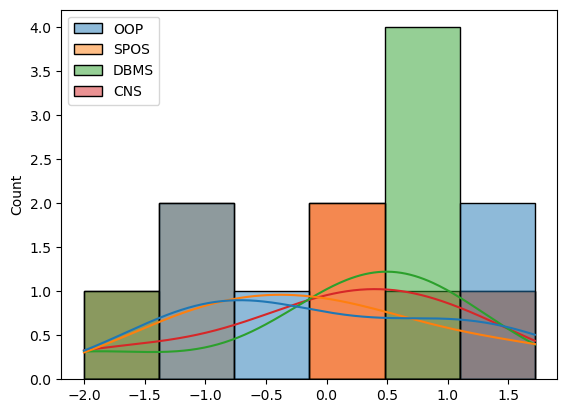

In [48]:
sns.histplot(data=df[["OOP","SPOS","DBMS","CNS"]],kde=True)